# Übung "Deskriptive Statistik"

## Daten einlesen

In der Übung arbeiten Sie mit dem *housing* Datensatz. Dieser umfasst 546 Beobachtungen zu den Verkaufspreisen von Häusern in Windsor, Kanada. Die Daten sind in der Datei `housing.csv` abgelegt.

## Variablen
- `price`: sale price of a house
- `lotsize`: lot size of a property in square feet
- `bedrooms`: number of bedrooms
- `bathrms`: number of full bathrooms
- `stories`: number of stories excluding basement
- `driveway`: does the house have a driveway? 1 if True, otherwise 0
- `recroom`: does the house have a recreation room? 1 if True, otherwise 0
- `fullbase`: does the house have a full finished basement? 1 if True, otherwise 0
- `gashw`: does the house use gas for hot water heating? 1 if True, otherwise 0
- `airco`: does the house have central air conditioning? 1 if True, otherwise 0
- `garagepl`: number of garage places
- `prefarea`: is the house located in the preferred neighbourhood of the city? 1 if True, otherwise 0

In [6]:
# Bibliotheken importieren
import pandas as pd

## Teil 1

Lesen Sie die Daten ein und schauen Sie sich die ersten Zeilen an.

In [7]:
FILENAME_DATASET = "../../data/housing.csv"
df = pd.read_csv(FILENAME_DATASET, sep=";")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [8]:
# Spaltennamen und Datentyp anschauen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     546 non-null    int64
 1   lotsize   546 non-null    int64
 2   bedrooms  546 non-null    int64
 3   bathrms   546 non-null    int64
 4   stories   546 non-null    int64
 5   driveway  546 non-null    int64
 6   recroom   546 non-null    int64
 7   fullbase  546 non-null    int64
 8   gashw     546 non-null    int64
 9   airco     546 non-null    int64
 10  garagepl  546 non-null    int64
 11  prefarea  546 non-null    int64
dtypes: int64(12)
memory usage: 51.3 KB


In [9]:
# Transformiere Spalten in `bool`-Typ
AS_BOOL = ["driveway", "recroom", "fullbase", "gashw", "airco", "prefarea"]
df[AS_BOOL] = df[AS_BOOL].apply(lambda x: x.astype("bool"), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     546 non-null    int64
 1   lotsize   546 non-null    int64
 2   bedrooms  546 non-null    int64
 3   bathrms   546 non-null    int64
 4   stories   546 non-null    int64
 5   driveway  546 non-null    bool 
 6   recroom   546 non-null    bool 
 7   fullbase  546 non-null    bool 
 8   gashw     546 non-null    bool 
 9   airco     546 non-null    bool 
 10  garagepl  546 non-null    int64
 11  prefarea  546 non-null    bool 
dtypes: bool(6), int64(6)
memory usage: 28.9 KB


In [10]:
# Berechnen deskriptiver Statistiken für _alle_ Variablen
df.describe(include="all").round(2)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.00,546.00,546.00,546.00,546.00,546,546,546,546,546,546.00,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.60,5150.27,2.97,1.29,1.81,NaN,NaN,NaN,NaN,NaN,0.69,NaN
std,26702.67,2168.16,0.74,0.50,0.87,NaN,NaN,NaN,NaN,NaN,0.86,NaN
min,25000.00,1650.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
25%,49125.00,3600.00,2.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
50%,62000.00,4600.00,3.00,1.00,2.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
75%,82000.00,6360.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN


In [12]:
df["number_of_rooms"] = df["bedrooms"] + df["bathrms"] + df["recroom"]
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,number_of_rooms
0,42000,5850,3,1,2,True,False,True,False,False,1,False,4
1,38500,4000,2,1,1,True,False,False,False,False,0,False,3
2,49500,3060,3,1,1,True,False,False,False,False,0,False,4
3,60500,6650,3,1,2,True,True,False,False,False,0,False,5
4,61000,6360,2,1,1,True,False,False,False,False,0,False,3


In [13]:
# Aggregation von price und stories
df.agg(
    {
        "price": ["count", "mean", "median", "std", "min", "max"],
        "stories": ["count", "mean", "std", "min", "max"]
    }
).round(2)

,price,stories
count,546.00,546.00
mean,68121.60,1.81
median,62000.00,NaN
std,26702.67,0.87
min,25000.00,1.00
max,190000.00,4.00


In [14]:
# Anzahl der Räume
df["number_of_rooms"] = df["bedrooms"] + df["bathrms"]
nrooms_mean = df.number_of_rooms.mean()
nrooms_q10 = df.number_of_rooms.quantile(0.1)
nrooms_q90 = df.number_of_rooms.quantile(0.9)

# Create a dataframe with the statistics
statistics_nrooms = pd.DataFrame(data={"Number of rooms": [nrooms_mean, nrooms_q10, nrooms_q90]},
                                 index=["mean", "q10", "q90"]).round(2)
statistics_nrooms

,Number of rooms
mean,4.25
q10,3.00
q90,6.00


## Teil 2

### Hypothese mit einer Gruppierungsvariable

1) Der mittlere Hauspreis ist höher für Häuser in präferierten Gegenden als für Häuser in nicht präferierten Gegenden.

2) Der Hauspreis steigt mit der Anzahl der Schlafzimmer.

In [16]:
# Prüfe Hypothese 1: "Häuser in präferierten Gegenden sind teurer"
df.groupby("prefarea")["price"].agg(["mean", "median", "std"]).round(2)

,mean,median,std
prefarea,,,
False,63263.49,58500.0,24214.23
True,83986.37,79750.0,28342.93


Der mittlere Hauspreis für Häuser in präferierten Gegenden liegt bei knapp 84,000 USD, und ist somit deutlich höher als für Häuser in nicht präferierten Gegenden, die im Mittel 63,200 USD kosten. Ein ähnliches Bild ergibt sich für die Medianwerte. Jedoch weist die Standardabweichung darauf hin, dass die Preise innerhalb einer gruppe stark variieren (Standardweichung liegt bei ca. 24 bis 28 Tausend USD). Dies deutet daraufhin, dass die Unterschiede in den Mittelwerten nicht signifikant sein könnten.

### Hypothese mit zwei Gruppierungsvariablen

1) Häuser mit einer Klimaanlage und einer Garage sind teurer als Häuser ohne Klimaanlage und Garage.
2) Der Hauspreis ist höher für Häuser mit einer Klimaanlage als für Häuser mit einer Garage.

In [17]:
# Erzeuge eine binäre Variable für Garagen
df["has_garagepl"] = df["garagepl"] > 0

GROUPBY = ["airco", "has_garagepl"]

df.groupby(GROUPBY)["price"].agg(
    ["mean", "median", "std"]).round(2)

mean   median       std
airco has_garagepl                             
False False         54211.43  52000.0  16871.16
      True          68319.33  62000.0  24350.49
True  False         73500.65  75000.0  19341.77
      True          95810.33  94500.0  30719.45

#### Hypothese 1
Der mittlere Hauspreis für Häuser mit Klimaanlage und Garage liegt bei 95,600 USD, und ist somit deutlich höher als für Häuser ohne Klimaanlage und Garage, die im Mittel 54,000 USD kosten. Jedoch variieren die Preis für den ersten Fall sehr stark, worauf die Standardabweichung von 30,700 USD hinweist. Dies deutet daraufhin, dass die Unterschiede in den Mittelwerten nicht signifikant sein könnten.

### Hypothese 2
Der mittlere Hauspreis für Häuser mit Klimaanlage und ohne Garage liegt bei 73,500 USD, und ist somit ca. 5,000 USD höher als für Häuser mit Garage aber ohne Klimaanlage. Die Standardabweichung von sind jedoch für beide Fälle sehr hoch mit 19,300 bzw. 24,000 USD. Dies deutet daraufhin, dass die Unterschiede in den Mittelwerten nicht signifikant sein könnten.

### Custom Aggregate Function

In [18]:
def iqr(x: pd.Series) -> float:
    """
    Calculate the interquartile range (IQR) of a given list or series.

    The IQR is a measure of statistical dispersion and is calculated as the difference
    between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

    Parameters:
    x (pandas.Series or similar): The data series to calculate the IQR for.

    Returns:
    float: The IQR of the data.
    """
    return x.quantile(0.75) - x.quantile(0.25)

In [19]:
GROUPBY = ["airco"]

df.groupby(GROUPBY)["price"].agg(iqr).round(2)

airco
False    25000.0
True     37000.0
Name: price, dtype: float64

Die Spannweite der mittleren 50 % der Hauspreise beträgt 25,000 USD für Häuser ohne Klimaanlage. Für Immobilien mit Klimaanlage beträgt die Spannweite sogar 37,000 USD. Dies deutet darauf hin, dass die Preise für Häuser der mittleren Preiskatgeorieen mit Klimaanlage stärker variieren als für Häuser ohne Klimaanlage.

airco
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

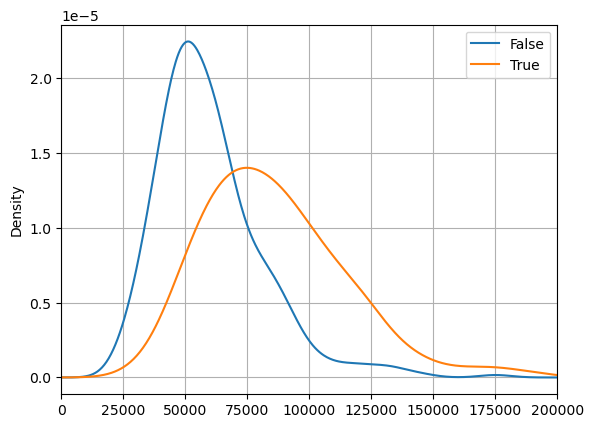

In [20]:
# Kerndichte-Plot je Ausprägung der Variable `airco`
df.groupby("airco")["price"].plot.density(
    alpha=1.0, legend=True, grid=True, xlim=(0, 200000))

Der Plot zeigt, dass die Preise für Häuser mit Klimaanlage stärker variieren als für Häuser ohne Klimaanlage.